In [10]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #turn off scientific notation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [11]:
#read Zillow 3 bedroom data by county into pandas dataframe
file = "County_Zhvi_3bedroom.csv"
zillow_df = pd.read_csv("County_Zhvi_3bedroom.csv", encoding = "latin-1")
zillow_df.head()

,RegionID,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2008-01,2008-02,2008-03,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,3101,Los Angeles County,CA,Los Angeles-Long Beach-Anaheim,6,37,1,nan,nan,nan,...,600754.33,599393.33,599503.33,600387.00,602727.33,600822.00,600501.67,601233.00,605862.00,609034.00
1,139,Cook County,IL,Chicago-Naperville-Elgin,17,31,2,nan,nan,nan,...,226143.33,227082.67,228167.00,228926.67,228869.67,228349.67,227408.00,226548.33,225984.67,225928.67
2,1090,Harris County,TX,Houston-The Woodlands-Sugar Land,48,201,3,124604.00,124348.50,124172.33,...,173528.00,173910.33,173899.00,173980.00,174518.00,175041.00,175728.00,176058.33,176914.00,177541.00
3,2402,Maricopa County,AZ,Phoenix-Mesa-Scottsdale,4,13,4,nan,nan,nan,...,260194.00,261705.00,262585.67,263689.00,264876.67,266422.33,268442.00,270188.67,272057.67,273468.67
4,2841,San Diego County,CA,San Diego-Carlsbad,6,73,5,415019.00,410783.00,406752.67,...,561999.67,561455.00,563480.33,564365.67,566461.00,568930.33,571215.67,571894.67,573083.00,575533.33


In [12]:
#keep all rows of the following counties:  Shasta County, Los Angeles County, San Francisco County, Fresno County

zillow_df = zillow_df.loc[(zillow_df["RegionName"] == "Los Angeles County") | 
                            (zillow_df["RegionName"] == "Fresno County") |
                            (zillow_df["RegionName"] == "San Francisco County") |
                            (zillow_df["RegionName"] == "Shasta County"), :]

# use .copy() to avoid SettingWithCopyWarning warning
counties_df= zillow_df[["RegionName"]].copy()

#Calc average yearly price from 2014 - 2018 of
counties_df["2014 Avg Price"] = zillow_df.loc[:,"2014-01":"2014-12"].mean(axis=1)
counties_df["2015 Avg Price"] = zillow_df.loc[:,"2015-01":"2015-12"].mean(axis=1)
counties_df["2016 Avg Price"] = zillow_df.loc[:,"2016-01":"2016-12"].mean(axis=1)
counties_df["2017 Avg Price"] = zillow_df.loc[:,"2017-01":"2017-12"].mean(axis=1)
counties_df["2018 Avg Price"] = zillow_df.loc[:,"2018-01":"2018-12"].mean(axis=1)
counties_df.head()

#Keep the following columns = Region name and columns from years 14 - 18
#counties_df = zillow_df.iloc[:, [1, 79:140]] - ask ta
#counties_df = zillow_df.iloc[:, 79:140]

,RegionName,2014 Avg Price,2015 Avg Price,2016 Avg Price,2017 Avg Price,2018 Avg Price
0,Los Angeles County,456951.25,482374.33,518062.94,555362.75,596094.53
44,Fresno County,180313.22,191649.06,203774.64,220687.50,238799.28
64,San Francisco County,1194854.92,1292884.22,1388945.64,1471771.03,1620575.75
342,Shasta County,202065.47,216334.31,226238.28,241436.89,253039.00


In [49]:
#add income data to counties_df.  
#Data from https://www.bea.gov/system/files/2019-11/lapi1119.pdf. 
#Data from https://www.bea.gov/system/files/2018-02/lapi1116.pdf
#I'm having issues reading the excel version of data, so entering by hand  

#making a dictionary of income
column_names= list(counties_df["RegionName"])

income_df = pd.DataFrame({"RegionName":column_names,
                         "2014 Income":[50730, 36448, 97498, 38410],
                         "2015 Income":[53521, 38323, 103529, 40882],
                         "2016 Income":[57127, 40327, 114697, 43412],
                         "2017 Income":[59058, 41137, 121778, 44480],
                         "2018 Income":[62224, 43084, 130696, 46582]
                         })

income_df.set_index("RegionName", inplace=True)
income_df = income_df.transpose()
income_df.head()

#merge counties and income dataframes into a master df
#merge_df = pd.merge(counties_df, income_df, on="RegionName")
#merge_df.head()

RegionName,Los Angeles County,Fresno County,San Francisco County,Shasta County
2014 Income,50730,36448,97498,38410
2015 Income,53521,38323,103529,40882
2016 Income,57127,40327,114697,43412
2017 Income,59058,41137,121778,44480
2018 Income,62224,43084,130696,46582


In [44]:
#get SF data, transpose table and plot

counties1_df = counties_df.loc[:,"RegionName": "2018 Avg Price"]
counties1_df.set_index("RegionName", inplace = True)
counties1_df = counties1_df.transpose()
counties1_df.head()

RegionName,Los Angeles County,Fresno County,San Francisco County,Shasta County
2014 Avg Price,456951.25,180313.22,1194854.92,202065.47
2015 Avg Price,482374.33,191649.06,1292884.22,216334.31
2016 Avg Price,518062.94,203774.64,1388945.64,226238.28
2017 Avg Price,555362.75,220687.50,1471771.03,241436.89
2018 Avg Price,596094.53,238799.28,1620575.75,253039.00


<IPython.core.display.Javascript object>


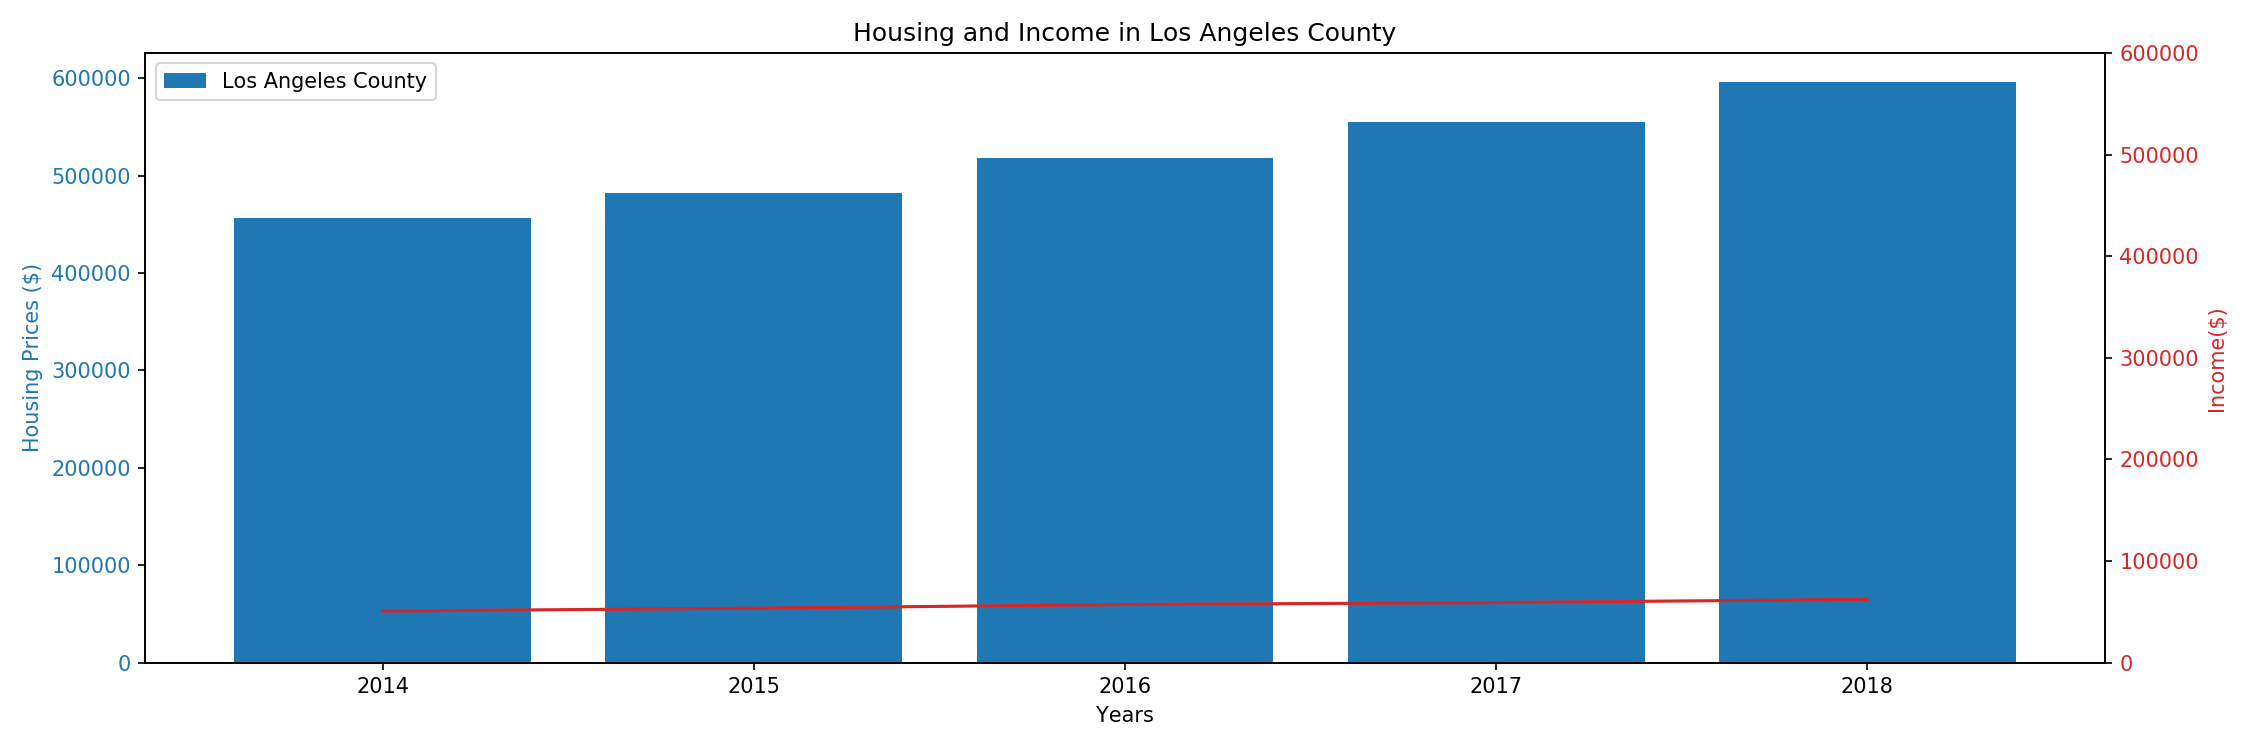

In [61]:
#plot LA income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = counties1_df.loc[:,"Los Angeles County"]
y2bar = income_df.loc[:, "Los Angeles County"]


fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Los Angeles County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Los Angeles County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("IncomandHousingPricesinLACounty.png")
plt.show()


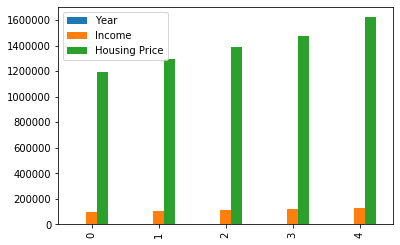

In [5]:
#plot LA income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1bar = counties1_df.loc[:,"Los Angeles County"]
y2bar = income_df.loc[:, "Los Angeles County"]



In [ ]:

#get SF housing price list
#sf_housing = merge_df.loc[merge_df["RegionName"] == "San Francisco County","2014 Avg Price":"2018 Avg Price"]
#sf_housing = list(sf_housing.iloc[0,:])

#get SF income
#sf_income = merge_df.loc[merge_df["RegionName"] == "San Francisco County","2014 Income":"2018 Income"]
#sf_income =list(sf_income.iloc[0,:])

#make dictionary of lists and convert into a dataframe
#sf_df = pd.DataFrame({"Year": years,
                      "Income": sf_income,
                      "Housing Price": sf_housing,})



#sf_df.head()


#sf_df.plot.bar()